# Myopia

## Part 1: Prepare the Data

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans 

In [18]:
file_path = Path("myopia.csv")
df = pd.read_csv(file_path)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [19]:
# Column names
df.columns

Index(['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY', 'MYOPIC'],
      dtype='object')

In [20]:
# Split the dataframe into data and target
y = df["MYOPIC"].values
x = df.drop("MYOPIC", axis=1).copy()

In [22]:
# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

df.shape

(618, 15)

In [28]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns= ['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY'])
X.head()


,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138,1.003241
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138,1.003241
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,-1.013030,-0.996769
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,-1.013030,1.003241
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,-0.996769


## Part 2: Apply Dimensionality Reduction

In [33]:
#perform PCA
# Initialize PCA model
pca = PCA(n_components=0.9)


# Get two principal components for the myopic data.
scaled_data_pca = pca.fit_transform(X)

# Fetch the explained variance
pca.explained_variance_ratio_.sum()

0.9187361702915187

In [34]:
#shape of the features after reduction
scaled_data_pca.shape

(618, 10)

In [37]:
#run TSNE
tsne = TSNE(learning_rate=35)

tsne_features = tsne.fit_transform(scaled_data_pca)

/Users/allysonmcinnis/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [38]:
tsne_features.shape

(618, 2)

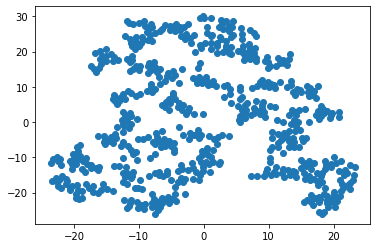

In [12]:
# Visualize the clusters
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

## Part 3: Perform a Cluster Analysis with K-means

In [15]:
inertia = []
k = list(range(1, 11))


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df)
    inertia.append(km.inertia_)



# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()



,k,inertia
0,1,234077.487563
1,2,126281.996310
2,3,93178.921127
3,4,78306.115708
4,5,67315.950891


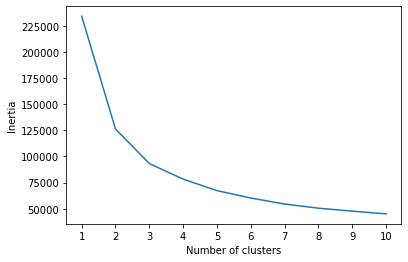

In [16]:

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## Part 4: Make a Recommendation

Based on this analysis, there are clusters of patients but none distinct enough that I think it would be wise to cluster them. The clusters are so close together I can't say how many distinct clusters are shown. I believe running these patient's individaully would bring about the most accurate data.